# Exploratory Data Analysis

## Data Preprocessing

In [1]:
# data preporcessing
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()  

In [2]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_month'] = df['job_posted_date'].dt.month

In [3]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,6
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

## Number of monthly job postings of top 3 job titles in US

In [6]:
df1 = df.loc[df['job_country'] == 'United States'].copy()

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206292 entries, 0 to 785705
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        206292 non-null  object        
 1   job_title              206292 non-null  object        
 2   job_location           205505 non-null  object        
 3   job_via                206285 non-null  object        
 4   job_schedule_type      205099 non-null  object        
 5   job_work_from_home     206292 non-null  bool          
 6   search_location        206292 non-null  object        
 7   job_posted_date        206292 non-null  datetime64[ns]
 8   job_no_degree_mention  206292 non-null  bool          
 9   job_health_insurance   206292 non-null  bool          
 10  job_country            206292 non-null  object        
 11  salary_rate            25372 non-null   object        
 12  salary_year_avg        15766 non-null   float64  

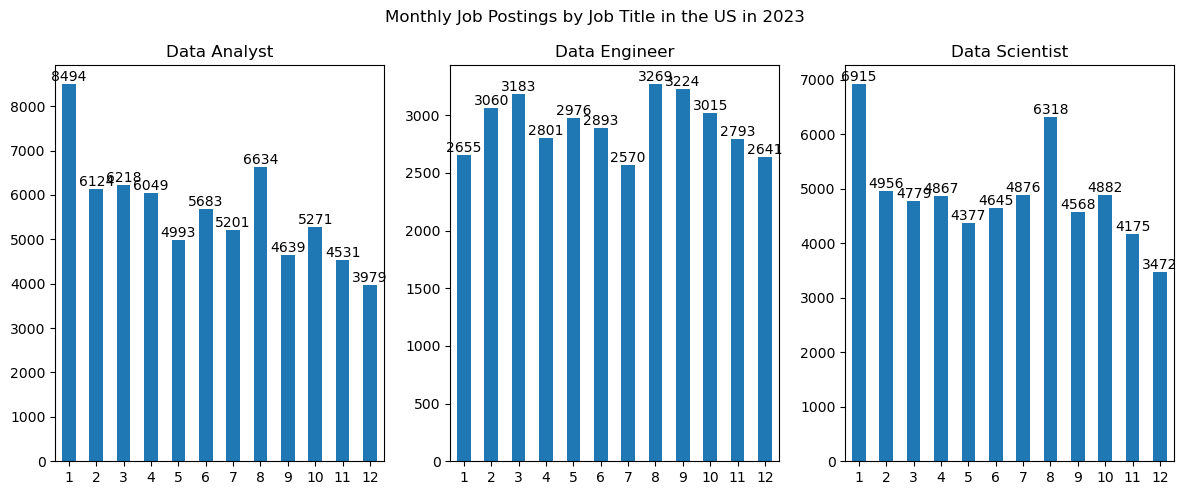

In [8]:
df_DA = df1.loc[df1['job_title_short'] == 'Data Analyst']
df_DE = df1.loc[df1['job_title_short'] == 'Data Engineer']
df_DS = df1.loc[df1['job_title_short'] == 'Data Scientist']
plt.figure(figsize = (12,5))
plt.subplot(1,3,1)
df_DA_graph = df_DA['job_posted_month'].value_counts().sort_index(ascending = True)
df_DA_graph.plot(kind='bar')
for index, value in enumerate(df_DA_graph.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.xlabel('')
plt.title('Data Analyst')
plt.xticks(rotation = 0)
plt.subplot(1,3,2)
df_DE_graph = df_DE['job_posted_month'].value_counts().sort_index(ascending=True)
df_DE_graph.plot(kind='bar')
for index, value in enumerate(df_DE_graph.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.xlabel('')
plt.title('Data Engineer')
plt.xticks(rotation = 0)
plt.subplot(1,3,3)
df_DS_graph = df_DS['job_posted_month'].value_counts().sort_index(ascending=True)
df_DS_graph.plot(kind='bar')
for index, value in enumerate(df_DS_graph.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.xlabel('')
plt.title('Data Scientist')
plt.xticks(rotation = 0)
plt.suptitle('Monthly Job Postings by Job Title in the US in 2023')
plt.tight_layout()

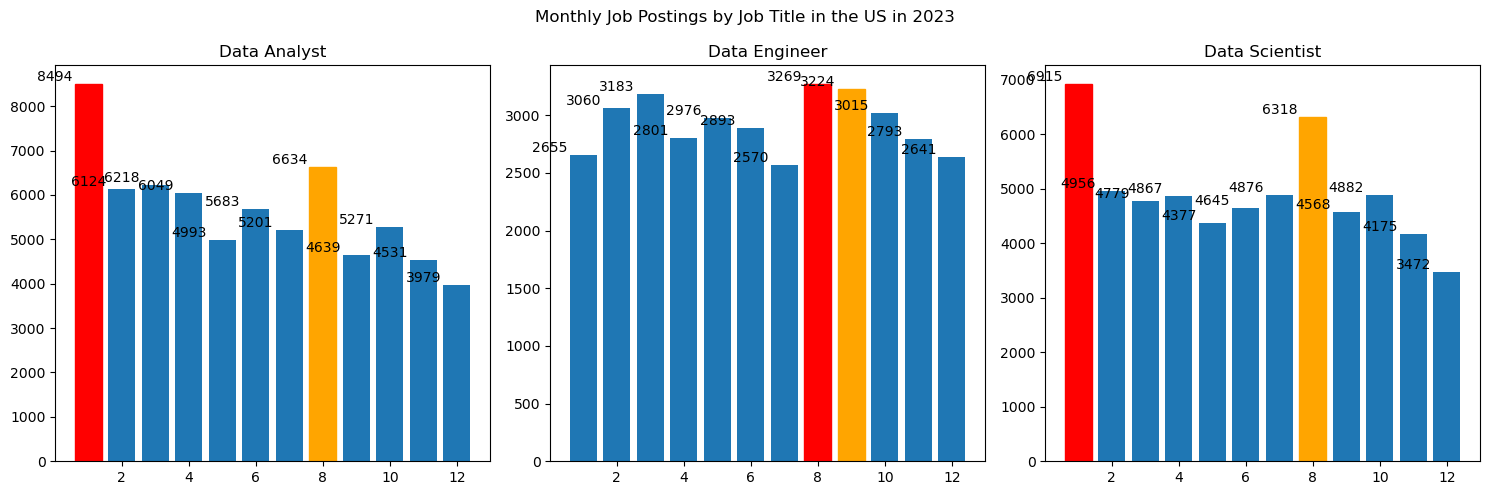

In [9]:
import matplotlib.pyplot as plt

# Assuming df1 is already defined and contains the necessary data

df_DA = df1.loc[df1['job_title_short'] == 'Data Analyst']
df_DE = df1.loc[df1['job_title_short'] == 'Data Engineer']
df_DS = df1.loc[df1['job_title_short'] == 'Data Scientist']

plt.figure(figsize=(15, 5))

# Data Analyst plot
plt.subplot(1, 3, 1)
df_DA_graph = df_DA['job_posted_month'].value_counts().sort_index(ascending=True)
bars = plt.bar(df_DA_graph.index, df_DA_graph.values)
# Highlight the most and second highest bars
highest = df_DA_graph.nlargest(2)
bars[df_DA_graph.index.get_loc(highest.index[0])].set_color('red')
bars[df_DA_graph.index.get_loc(highest.index[1])].set_color('orange')
for index, value in enumerate(df_DA_graph.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.title('Data Analyst')

# Data Engineer plot
plt.subplot(1, 3, 2)
df_DE_graph = df_DE['job_posted_month'].value_counts().sort_index(ascending=True)
bars = plt.bar(df_DE_graph.index, df_DE_graph.values)
# Highlight the most and second highest bars
highest = df_DE_graph.nlargest(2)
bars[df_DE_graph.index.get_loc(highest.index[0])].set_color('red')
bars[df_DE_graph.index.get_loc(highest.index[1])].set_color('orange')
for index, value in enumerate(df_DE_graph.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.title('Data Engineer')

# Data Scientist plot
plt.subplot(1, 3, 3)
df_DS_graph = df_DS['job_posted_month'].value_counts().sort_index(ascending=True)
bars = plt.bar(df_DS_graph.index, df_DS_graph.values)
# Highlight the most and second highest bars
highest = df_DS_graph.nlargest(2)
bars[df_DS_graph.index.get_loc(highest.index[0])].set_color('red')
bars[df_DS_graph.index.get_loc(highest.index[1])].set_color('orange')
for index, value in enumerate(df_DS_graph.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.title('Data Scientist')

plt.suptitle('Monthly Job Postings by Job Title in the US in 2023')
plt.tight_layout()
plt.show()

In [81]:
top_3 = df['job_title_short'].value_counts().nlargest(3).index

In [82]:
df_top_3 = df1.loc[df1['job_title_short'].isin(top_3)]

In [83]:
df_top_3

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '...",11
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",4
11,Data Engineer,Data Engineer,"Colorado Springs, CO (+3 others)",via The Muse,Full-time,False,"Texas, United States",2023-11-03 13:06:51,False,True,United States,None,NaN,NaN,Philips,"[python, qlik]","{'analyst_tools': ['qlik'], 'programming': ['p...",11
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"[go, apl, excel]","{'analyst_tools': ['excel'], 'programming': ['...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None,10
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['...",7
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}",4
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1


In [ ]:
from scipy import stats
import numpy as np
top_3 = df['job_title_short'].value_counts().nlargest(3)
df_top_3 = df1.loc[df1['job_title_short'].isin(top_3.index)]
lower_bound, upper_bound = np.percentile(df_top_3['salary_year_avg'].dropna(), [1, 99])

# Filter out extreme salary values (1st and 99th percentile)
df_top_3_cleaned = df_top_3[
    (df_top_3['salary_year_avg'] >= lower_bound) &
    (df_top_3['salary_year_avg'] <= upper_bound)
]

## Mean, Mode, Median of yearly salary of top 3 Job Titles in US

### Descriptive Statistics of Top 3 Job Titles in US

In [87]:
group_by = df_top_3_cleaned.groupby('job_title_short')['salary_year_avg'].agg(['mean', 'median', mode])
group_by

,mean,median,mode
job_title_short,,,
Data Analyst,95149.102938,90000.0,90000.0
Data Engineer,132139.167792,125000.0,125000.0
Data Scientist,136986.045486,129326.0,90000.0


### Average Yearly Salary by Top 3 Job Title in the US in 2023

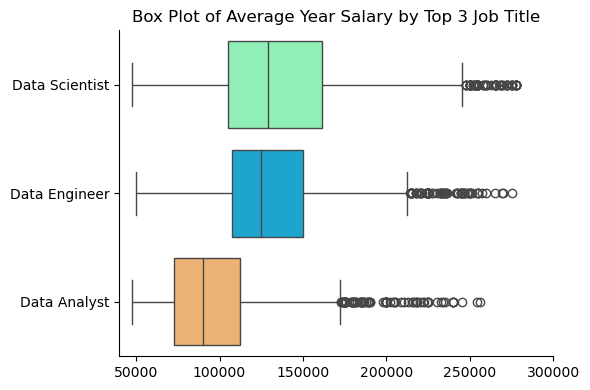

In [88]:
top3_order = df_top_3.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
plt.figure(figsize=(6, 4))

sns.boxplot(data=df_top_3_cleaned, x='salary_year_avg', y='job_title_short',hue='job_title_short', palette='rainbow', order =top3_order)
sns.despine()
plt.ylabel('')
plt.xlabel('')
plt.title('Box Plot of Average Year Salary by Top 3 Job Title')
plt.xlim(40000, 300000)
plt.tight_layout()
plt.show()

### Average Yearly Salary by Top 6 Job Title in the US in 2023

C:\Temp\ipykernel_21148\1413935944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top6.dropna(subset=['salary_year_avg'], inplace=True)


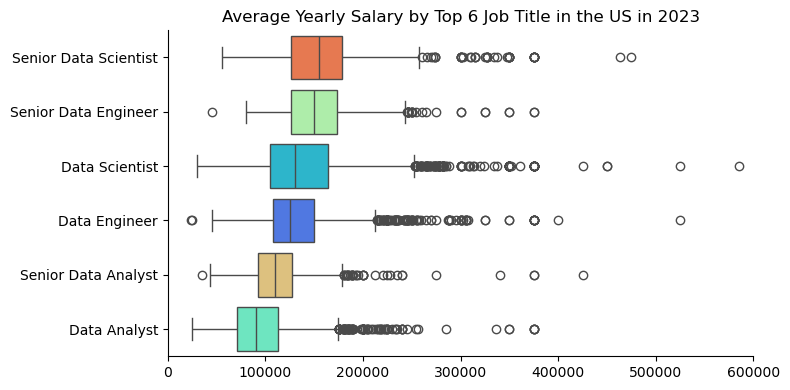

In [89]:
top6 = df1['job_title_short'].value_counts().nlargest(6).index
df_top6 = df1.loc[df1['job_title_short'].isin(top6)]

df_top6.dropna(subset=['salary_year_avg'], inplace=True)

top6_order = df_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

plt.figure(figsize = (8,4))
sns.boxplot(data= df_top6, x='salary_year_avg', y='job_title_short', hue = 'job_title_short', order=top6_order, palette='rainbow')
sns.despine()
plt.xlim(0,600000)
plt.xlabel('')
plt.ylabel('')
plt.title('Average Yearly Salary by Top 6 Job Title in the US in 2023')
plt.tight_layout()
plt.show()

## Top demanding skills of Data Analyst, Data Engineer, Data Scientist in US

### Top Most Required Skills by Top 3 Job Title in the US

In [19]:
df_top_3_exp = df_top_3.explode('job_skills')

In [20]:
df_top_3_exp.loc[df_top_3_exp['job_title_short'] == 'Data Analyst']['job_skills'].value_counts().nlargest(5).to_frame(name = 'total')

,total
job_skills,
sql,34452
excel,27519
tableau,19311
python,18382
sas,13200


In [21]:
DA_skill = df_top_3_exp.loc[df_top_3_exp['job_title_short'] == 'Data Analyst']['job_skills'].value_counts().nlargest(5).reset_index()
DE_skill = df_top_3_exp.loc[df_top_3_exp['job_title_short'] == 'Data Engineer']['job_skills'].value_counts().nlargest(5).reset_index()
DS_skill = df_top_3_exp.loc[df_top_3_exp['job_title_short'] == 'Data Scientist']['job_skills'].value_counts().nlargest(5).reset_index()

In [22]:
len(df_top_3.loc[df_top_3['job_title_short'] == 'Data Analyst'])

67816

In [23]:
DA_skill['total'] = len(df_top_3.loc[df_top_3['job_title_short'] == 'Data Analyst'])
DE_skill['total'] = len(df_top_3.loc[df_top_3['job_title_short'] == 'Data Engineer'])
DS_skill['total'] = len(df_top_3.loc[df_top_3['job_title_short'] == 'Data Scientist'])

In [24]:
DA_skill

,job_skills,count,total
0,sql,34452,67816
1,excel,27519,67816
2,tableau,19311,67816
3,python,18382,67816
4,sas,13200,67816


In [25]:
DE_skill

,job_skills,count,total
0,sql,23958,35080
1,python,22762,35080
2,aws,15018,35080
3,azure,11321,35080
4,spark,11242,35080


In [26]:
DS_skill

,job_skills,count,total
0,python,42379,58830
1,sql,30034,58830
2,r,26022,58830
3,sas,14340,58830
4,tableau,13859,58830


In [27]:
DA_skill['percentage'] = DA_skill['count'] / DA_skill['total'] * 100
DE_skill['percentage'] = DE_skill['count'] / DE_skill['total'] * 100
DS_skill['percentage'] = DS_skill['count'] / DS_skill['total'] * 100

In [28]:
DA_skill

,job_skills,count,total,percentage
0,sql,34452,67816,50.802171
1,excel,27519,67816,40.578919
2,tableau,19311,67816,28.475581
3,python,18382,67816,27.105698
4,sas,13200,67816,19.464433


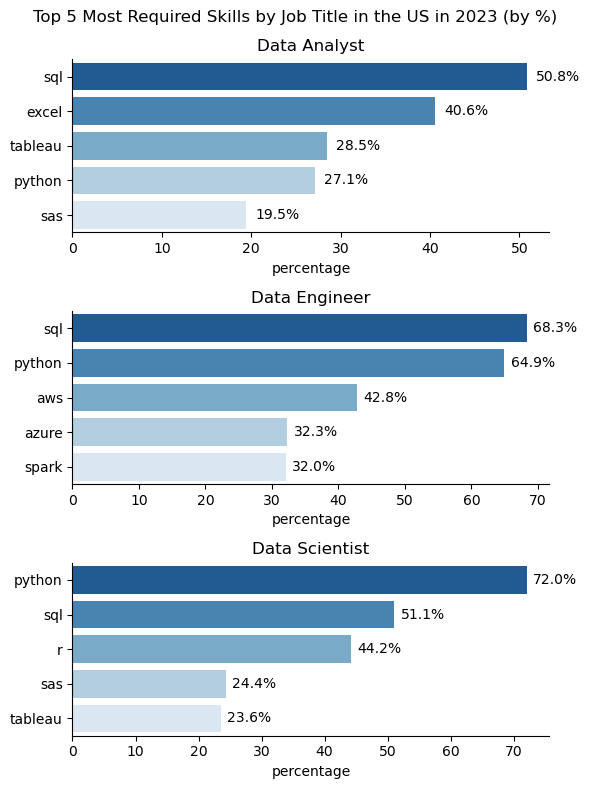

In [90]:
plt.figure(figsize=(6, 8))

# Data Analyst
plt.subplot(3, 1, 1)
sns.barplot(data = DA_skill, x = 'percentage', y= 'job_skills', hue='job_skills', palette='Blues_r', legend = False)
sns.despine()
plt.title('Data Analyst')
plt.ylabel('')
for index, value in enumerate(DA_skill['percentage']):
    plt.text(value+1, index, f'{value:.1f}%', va='center')

# Data Engineer
plt.subplot(3, 1, 2)
sns.barplot(data = DE_skill, x = 'percentage', y= 'job_skills', hue='job_skills', palette='Blues_r', legend = False)
sns.despine()
plt.title('Data Engineer')
plt.ylabel('')
for index, value in enumerate(DE_skill['percentage']):
    plt.text(value+1, index, f'{value:.1f}%', va='center')

# Data Scientist
plt.subplot(3, 1, 3)
sns.barplot(data = DS_skill, x = 'percentage', y= 'job_skills', hue='job_skills', palette='Blues_r', legend = False)
sns.despine()
plt.title('Data Scientist')
plt.ylabel('')
for index, value in enumerate(DS_skill['percentage']):
    plt.text(value+1, index, f'{value:.1f}%', va='center')
plt.suptitle('Top 5 Most Required Skills by Job Title in the US in 2023 (by %)')

plt.tight_layout()
plt.show()

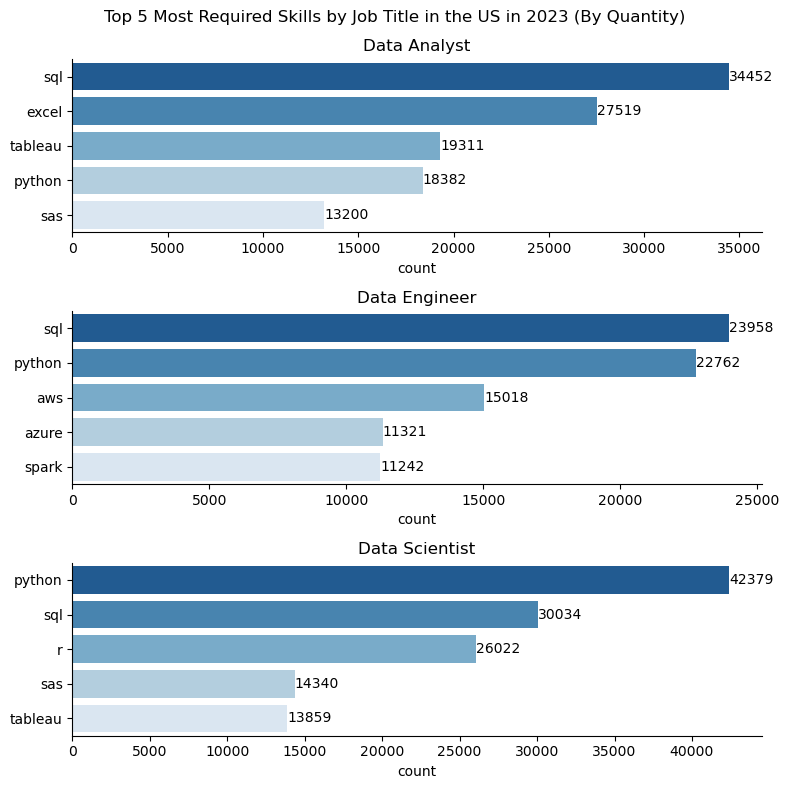

In [93]:
plt.figure(figsize=(8, 8))
# Data Analyst
plt.subplot(3, 1, 1)
sns.barplot(data = DA_skill, x = 'count', y= 'job_skills', hue='job_skills', palette='Blues_r', legend = False)
sns.despine()
plt.title('Data Analyst')
plt.ylabel('')
for index, value in enumerate(DA_skill['count']):
    plt.text(value +5, index, f'{value}', va='center')

# Data Engineer
plt.subplot(3, 1, 2)
sns.barplot(data = DE_skill, x = 'count', y= 'job_skills', hue='job_skills', palette='Blues_r', legend = False)
sns.despine()
plt.title('Data Engineer')
plt.ylabel('')
for index, value in enumerate(DE_skill['count']):
    plt.text(value+2, index, f'{value}', va='center')

# Data Scientist
plt.subplot(3, 1, 3)
sns.barplot(data = DS_skill, x = 'count', y= 'job_skills', hue='job_skills', palette='Blues_r', legend = False)
sns.despine()
plt.title('Data Scientist')
plt.ylabel('')
for index, value in enumerate(DS_skill['count']):
    plt.text(value+2, index, f'{value}', va='center')
plt.suptitle('Top 5 Most Required Skills by Job Title in the US in 2023 (By Quantity)')

plt.tight_layout()
plt.show()

### Top Highest-paid Skills by Top 3 Job Titles in the US  

## Skill Trend of Data Analysts in US 

In [31]:
df_DA_exp = df_top_3_exp.loc[df_top_3_exp['job_title_short'] == 'Data Analyst'].copy()

In [32]:
df_DA_pivot = df_DA_exp.pivot_table(
    index= 'job_skills',
    columns= 'job_posted_month',
    aggfunc= 'size',
    fill_value = 0
)
df_DA_pivot['total'] = df_DA_pivot.sum(axis = 1)
df_DA_pivot = df_DA_pivot.loc[df_DA_pivot['total'].nlargest(5).index]
df_DA_pivot.drop(columns = 'total', inplace = True)
df_DA_pivot = df_DA_pivot.T
df_DA_pivot

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
1,4601,3592,2488,2254,1832
2,3168,2587,1676,1618,1212
3,3226,2661,1804,1683,1238
4,3220,2549,1789,1679,1302
5,2581,2118,1432,1349,972
6,2862,2382,1628,1609,984
7,2609,2118,1533,1438,996
8,3414,2731,1951,2025,1276
9,2295,1801,1353,1229,856


<Axes: xlabel='job_posted_month'>

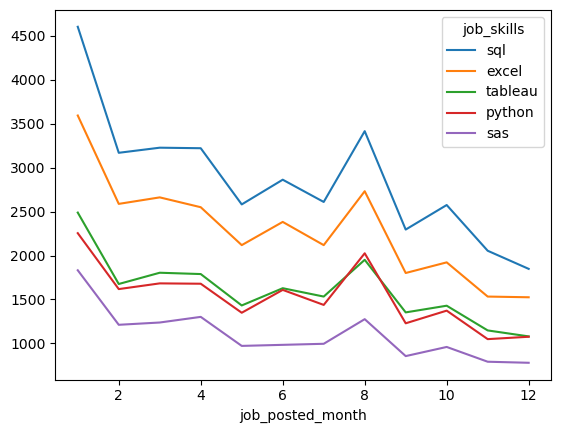

In [33]:
sns.lineplot(data = df_DA_pivot, dashes = False, palette = 'tab10')

In [34]:
df_DA_total = df_top_3.loc[df_top_3['job_title_short'] == 'Data Analyst']['job_posted_month'].value_counts()
df_DA_total


job_posted_month
1     8494
8     6634
3     6218
2     6124
4     6049
6     5683
10    5271
7     5201
5     4993
9     4639
11    4531
12    3979
Name: count, dtype: int64

In [35]:
df_DA_pivot = df_DA_pivot.div(df_DA_total/100, axis = 0)
df_DA_pivot

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
1,54.167648,42.288674,29.291264,26.536379,21.568166
2,51.730895,42.243632,27.367734,26.420640,19.790986
3,51.881634,42.795111,29.012544,27.066581,19.909939
4,53.231939,42.139197,29.575136,27.756654,21.524219
5,51.692369,42.419387,28.680152,27.017825,19.467254
6,50.360725,41.914482,28.646841,28.312511,17.314799
7,50.163430,40.722938,29.475101,27.648529,19.150163
8,51.462165,41.166717,29.409105,30.524570,19.234248
9,49.471869,38.823022,29.165768,26.492779,18.452253


In [36]:
import calendar

# Assuming df_DA_pivot is already defined and contains month numbers as index

# Create a mapping from month numbers to month names
month_mapping = {i: calendar.month_abbr[i] for i in range(1, 13)}

# Apply the mapping to the index of df_DA_pivot
df_DA_pivot.index = df_DA_pivot.index.map(month_mapping)

In [37]:
df_DA_pivot

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


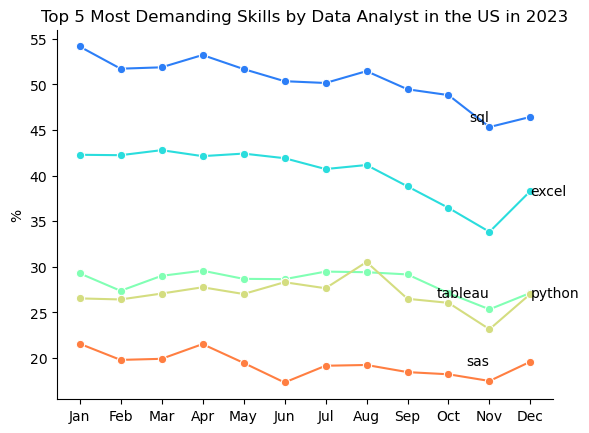

In [38]:
sns.lineplot(data = df_DA_pivot, legend = False, dashes = False, marker = 'o', palette = 'rainbow')
sns.despine()
plt.xlabel('')
plt.ylabel('%')
plt.title('Top 5 Most Demanding Skills by Data Analyst in the US in 2023')
# Annotate each line at the last data point
used_positions = set()

used_positions = set()
alignment = ['left', 'right']  # Alternating alignment

used_positions = set()

for i, column in enumerate(df_DA_pivot.columns):
    last_value = df_DA_pivot[column].iloc[-1]  # Last y-value
    last_x = df_DA_pivot.index[-1]  # Last x-value (month)

    # Adjust position if label would overlap
    offset = 0
    while (last_value + offset) in used_positions:
        offset += 0.8  # Shift up slightly

    used_positions.add(last_value + offset)

    # Alternate between placing the label at the end of November and December
    if i % 2 == 0:
        plt.text(df_DA_pivot.index[-2], last_value + offset, column, fontsize=10, verticalalignment='center', horizontalalignment='right')
    else:
        plt.text(last_x, last_value + offset, column, fontsize=10, verticalalignment='center', horizontalalignment='left')
plt.show()

In [47]:
top6 = df1['job_title_short'].value_counts().nlargest(6).index
df_top6 = df1.loc[df1['job_title_short'].isin(top6)]

In [45]:
df_top6.dropna(subset=['salary_year_avg'], inplace=True)

C:\Temp\ipykernel_21148\1240749651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top6.dropna(subset=['salary_year_avg'], inplace=True)


In [60]:
top6_order = df_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

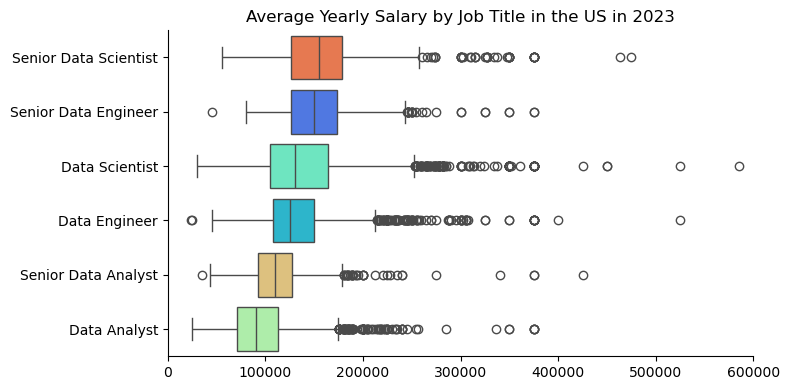

In [ ]:
plt.figure(figsize = (8,4))
sns.boxplot(data= df_top6, x='salary_year_avg', y='job_title_short', hue = 'job_title_short', order=top6_order, palette='rainbow')
sns.despine()
plt.xlim(0,600000)
plt.xlabel('')
plt.ylabel('')
plt.title('Average Yearly Salary by Top 6 Job Title in the US in 2023')
plt.tight_layout()
plt.show()